In [18]:
import pandas as pd

In [19]:
df=pd.read_csv('/content/drive/MyDrive/Practice/filtered_data.csv')

In [20]:
df.head()

,Date,NATURAL GAS,GOLD,SILVER,BRENT CRUDE,SUGAR,GASOLINE,HRW WHEAT,COFFEE,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,6.10,NaN,274.25,116.50,51.07
1,2000-01-04,2.176,283.7,5.375,24.39,5.77,NaN,274.00,116.25,50.73
2,2000-01-05,2.168,282.1,5.210,23.73,5.81,NaN,276.25,118.60,51.56
3,2000-01-06,2.196,282.4,5.167,23.62,5.77,NaN,275.00,116.85,52.08
4,2000-01-07,2.173,282.9,5.195,23.09,5.84,NaN,277.75,114.15,53.96


In [21]:
print(df.isna().sum())

Date              0
NATURAL GAS       9
GOLD             10
SILVER           13
BRENT CRUDE       2
SUGAR             9
GASOLINE       1491
HRW WHEAT        14
COFFEE           12
COTTON           13
dtype: int64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6092 non-null   object 
 1   NATURAL GAS  6083 non-null   float64
 2   GOLD         6082 non-null   float64
 3   SILVER       6079 non-null   float64
 4   BRENT CRUDE  6090 non-null   float64
 5   SUGAR        6083 non-null   float64
 6   GASOLINE     4601 non-null   float64
 7   HRW WHEAT    6078 non-null   float64
 8   COFFEE       6080 non-null   float64
 9   COTTON       6079 non-null   float64
dtypes: float64(9), object(1)
memory usage: 476.1+ KB


 **Import Necessary Libraries**

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout


**Clean the Data**

In [24]:
# Apply mean imputation only to numeric columns
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])


# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6092 non-null   datetime64[ns]
 1   NATURAL GAS  6092 non-null   float64       
 2   GOLD         6092 non-null   float64       
 3   SILVER       6092 non-null   float64       
 4   BRENT CRUDE  6092 non-null   float64       
 5   SUGAR        6092 non-null   float64       
 6   GASOLINE     6092 non-null   float64       
 7   HRW WHEAT    6092 non-null   float64       
 8   COFFEE       6092 non-null   float64       
 9   COTTON       6092 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 476.1 KB


**Exploratory Data Analysis (EDA)**

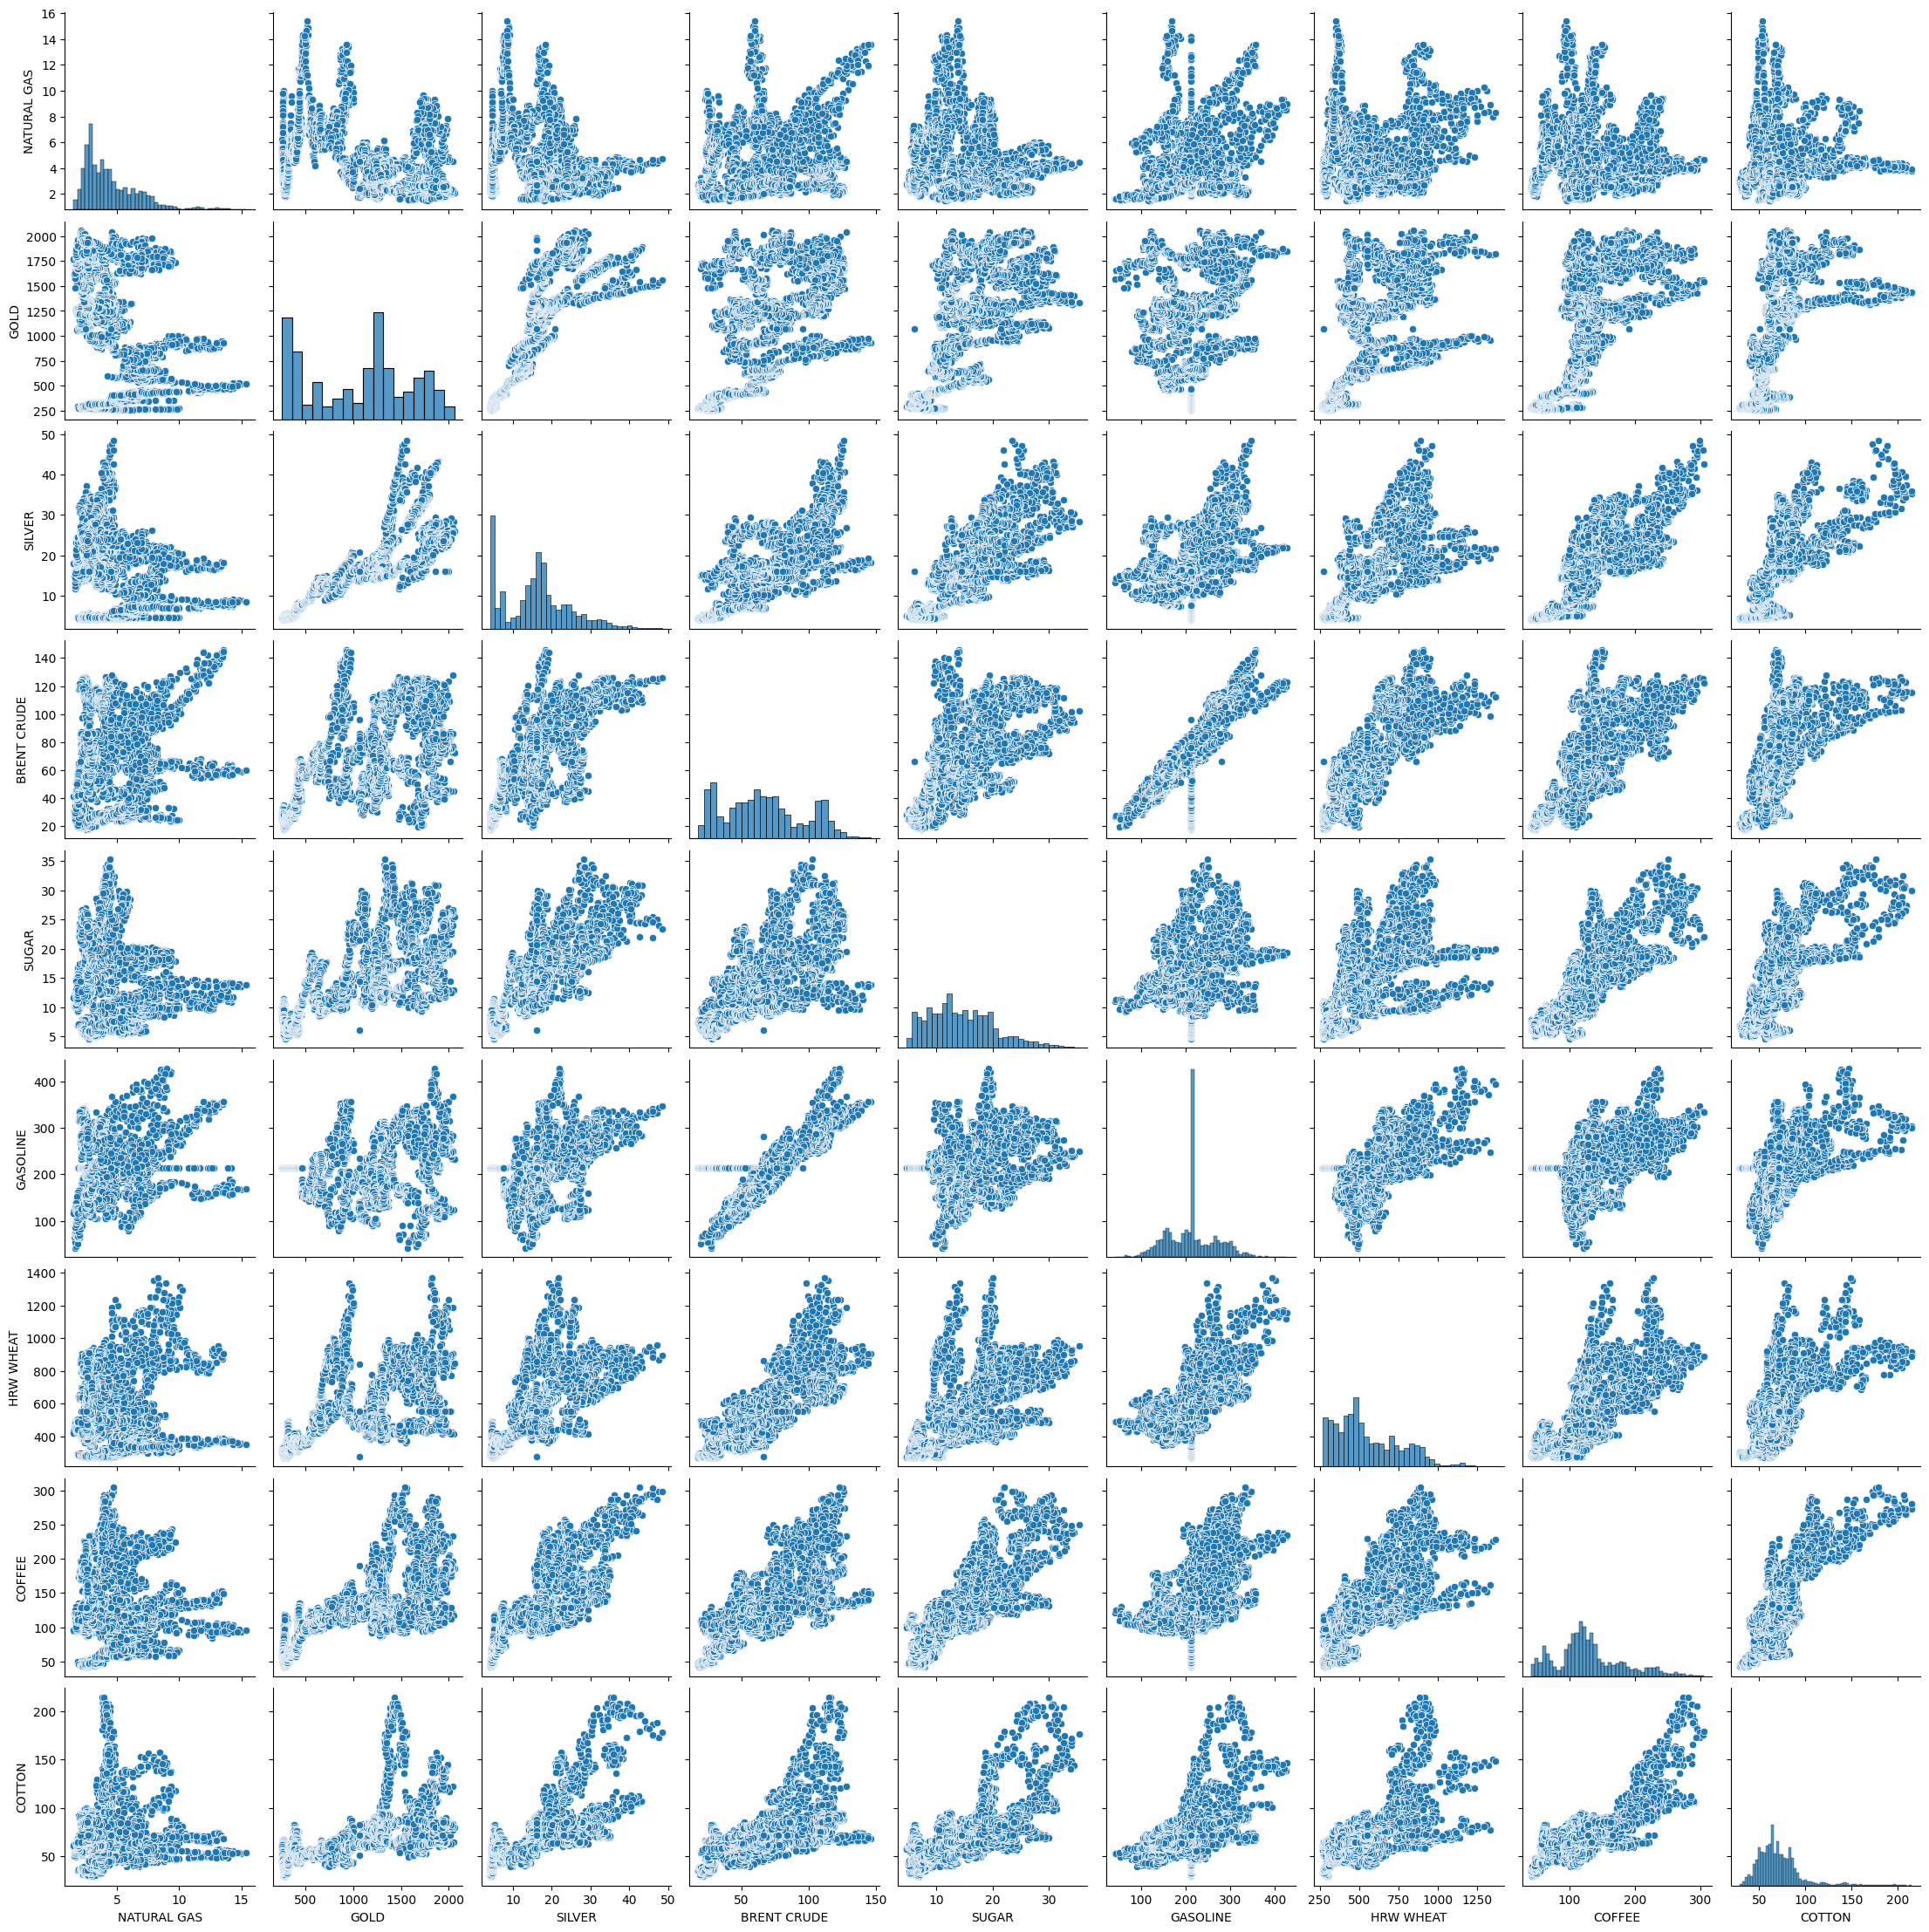

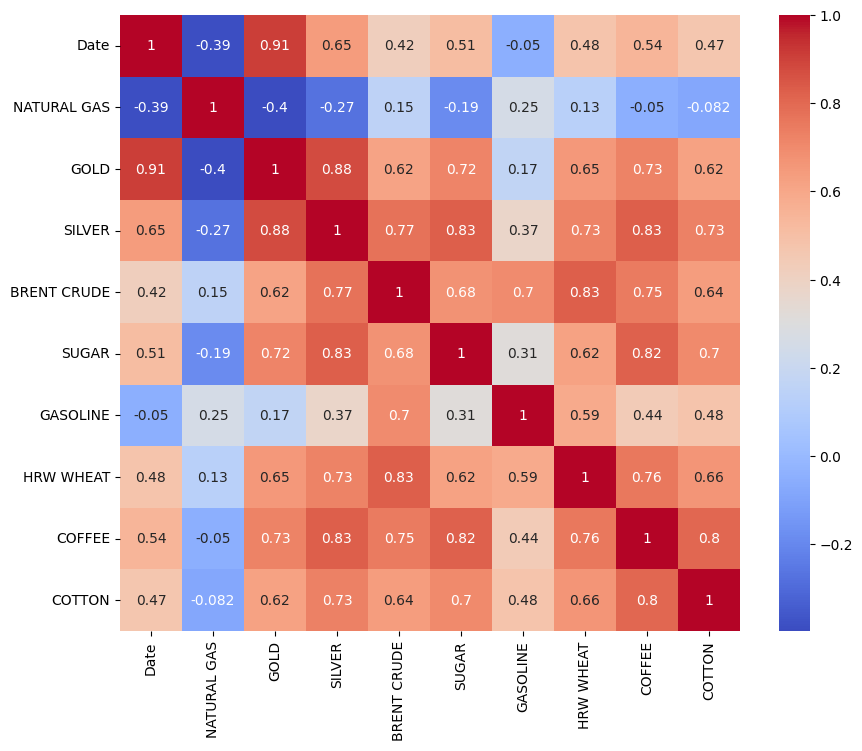

In [25]:
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



**When performing regression analysis, the goal is typically to predict a single target variable. This single target variable is known as the dependent variable or response variable.**

In [26]:
# Extract the target variable
X = df.drop(columns=['Date', 'GOLD'])  # Features
y = df['GOLD']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Baseline regressors**

In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 221.2152079819874
Linear Regression R^2: 0.8354163729160984


In [12]:
# Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("SVR R^2:", r2_score(y_test, y_pred_svr))

SVR RMSE: 236.79318824836233
SVR R^2: 0.8114202400810238


In [13]:
# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 26.95056583344695
Random Forest R^2: 0.9975571745051345


In [14]:
# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Decision Tree R^2:", r2_score(y_test, y_pred_dt))

Decision Tree RMSE: 44.67848437571013
Decision Tree R^2: 0.9932864298259028


In [15]:
# Gradient Boosting Regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("Gradient Boosting R^2:", r2_score(y_test, y_pred_gbr))

Gradient Boosting RMSE: 58.35113696571918
Gradient Boosting R^2: 0.9885486862539534


**Artificial Neural Network (ANN)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 1398918.3750 - val_loss: 832499.5625
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 642051.3125 - val_loss: 265740.0000
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222015.1406 - val_loss: 122540.7344
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105379.1406 - val_loss: 71259.3750
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67162.2344 - val_loss: 52318.7422
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56672.6875 - val_loss: 43535.8398
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48885.6562 - val_loss: 39682.3438
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49545.3359 - val_loss: 37617.1289
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45518.9297 - val_loss: 36386.6484
Epoch 10/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43365.9648 - val_loss: 34470.3750
Epoch 11/100
153/153 ━━━━━━━━━━━━━━━━━━━

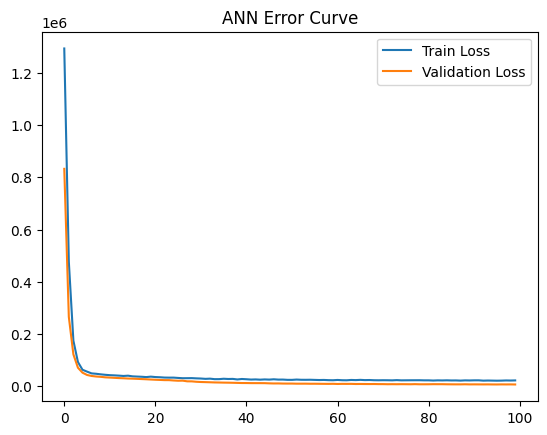

In [16]:
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_ann.compile(optimizer='adam', loss='mse')
history_ann = model_ann.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100)

# Plot the error curve for ANN
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('ANN Error Curve')
plt.show()


**CNN + ANN Model**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1155278.6250 - val_loss: 166846.5781
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 129290.3359 - val_loss: 60933.4727
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 70492.4766 - val_loss: 46842.8086
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59376.6133 - val_loss: 40010.5352
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 51811.4570 - val_loss: 35933.7734
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 48752.9805 - val_loss: 33055.2305
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 49362.1719 - val_loss: 29339.7285
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 44989.1641 - val_loss: 27037.0410
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43315.7031 - val_loss: 23309.7695
Epoch 10/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36182.8203 - val_loss: 21121.8555
Epoch 11/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

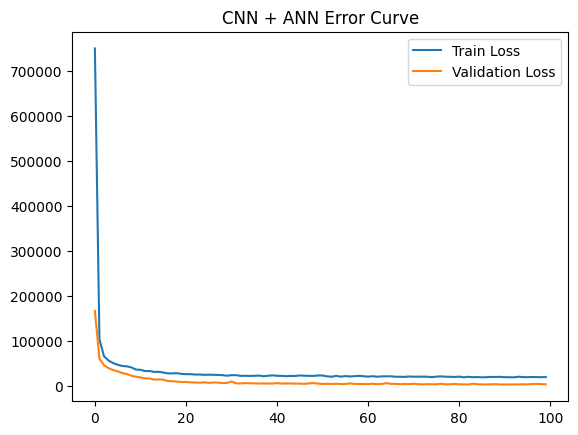

In [17]:
# Reshape data for CNN input
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# CNN + ANN Model
model_cnn = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_cnn.compile(optimizer='adam', loss='mse')
history_cnn = model_cnn.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=100)

# Plot the error curve for CNN + ANN Model
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('CNN + ANN Error Curve')
plt.show()
